In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pixiedust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Pixiedust database opened successfully


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('winemag_data_pandata.csv')

# 1. EDA

In [3]:
# data.head()

In [4]:
data['country'].value_counts()[0:3]
# Three largest are US, France, & Italy

US        54504
France    22093
Italy     19540
Name: country, dtype: int64

## Defining dataframes for each country's data:

In [5]:
print(data.isna().sum())
# Deal with missing data
data = data.dropna(subset=['price'])

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [6]:
US_match = data['country']=='US'
US_data = data[US_match]
US_data = US_data[['country', 'points','price']]
US_data.isna().sum()
# min(US_data['price'].values)
# Some prices are less than zero. Address this ASAP.
# max(US_data['price'].values)
# display(US_data)

country    0
points     0
price      0
dtype: int64

In [7]:
FR_match = data['country']=='France'
FR_data = data[FR_match]
FR_data = FR_data[['country', 'points','price']]
FR_data.isna().sum()
# min(FR_data['price'].values)
# Some prices are less than zero. Address this ASAP.
# max(FR_data['price'].values)
# display(FR_data)

country    0
points     0
price      0
dtype: int64

In [8]:
IT_match = data['country']=='Italy'
IT_data = data[IT_match]
IT_data = IT_data[['country', 'points','price']]
IT_data.isna().sum()
## NO nans in IT data.
# min(IT_data['price'].values)
# Some prices are less than zero. Address this ASAP.
# max(IT_data['price'].values)
# display(IT_data)

country    0
points     0
price      0
dtype: int64

In [9]:
hist_data = pd.concat([US_data, FR_data, IT_data])
hist_data.head()

,country,points,price
2,US,87,14.0
3,US,87,13.0
4,US,87,65.0
10,US,87,19.0
12,US,87,34.0


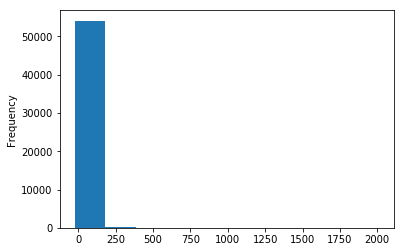

In [10]:
# Used pixiedust to create histograms.
# Refactor with matplotlib here:
US_data['price'].plot.hist()

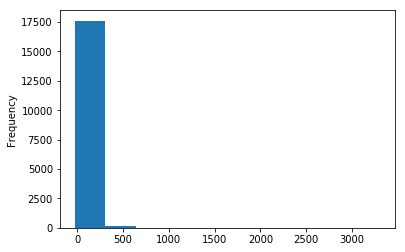

In [11]:
FR_data['price'].plot.hist()

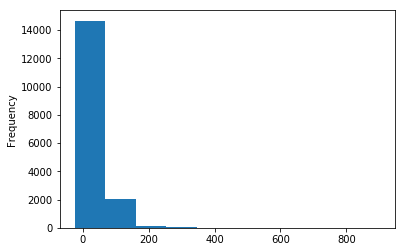

In [12]:
IT_data['price'].plot.hist()

In [13]:
# First refactor: fix missing data issue
# Second refactor: plot histograms with vanilla matplotlib or seaborn

In [ ]:
bar_data = data[['country', 'points', 'price']]
bar_data.sort_values(by='country', axis='index', ascending=False, inplace=True)
plt.bar(bar_data['price'], bar_data['points'], align='center', alpha=0.5)
plt.xticks(bar_data['price'])
plt.ylabel('Points')
plt.title('Points by price (per country with >=1000 reviews)')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


KeyboardInterrupt: 

# 2. Modeling

In [ ]:
# Create dataframe with price, points only
# data = pd.DataFrame(data['points'], data['price'])

In [ ]:
# Deal with missing data
data = data.dropna(subset=['points'])

In [ ]:
# NaNs did not seem to be dropping because I was using .count() instead of .sum()

In [ ]:
data.count()

In [ ]:
data.head()

In [ ]:
## Linear model - points from price

In [ ]:
X = data.loc[:, 'price'].values
X = X[~np.isnan(X)]
y = data.loc[:, 'points'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))
print(max(y_test - y_pred))

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
## Linear model - points from log of price

In [ ]:
X = data.loc[:, 'price'].values
X = X[~np.isnan(X)]
y = data.loc[:, 'points'].values
print(max(X))

In [ ]:
for i in range(len(X)):
    if X[i] > 0:
        X[i] = np.log(X[i]).astype(float)
    else:
        X[i] = 1
        # Set to a constant since failed to otherwise drop
print(max(X))

In [ ]:
np.count_nonzero(np.isnan(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))
print(max(y_test - y_pred))

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.show()

## Note on model preference

In viewing the plots of the above models, we see that the data
in the vanilla linear model tend to fall further from the model
as the price increases, almost seeming to curve.

However, the plot of log(price) versus points fits much more naturally.
This second model still needs some work as the spread is quite wide,
but the shape of the transformed data is a much better fit for a linear model.